In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kernels_compare.csv')
df

,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,...,basic-LZMA,basic-XZ-bzImage,basic-XZ-vmlinux,basic-XZ,basic-LZO-bzImage,basic-LZO-vmlinux,basic-LZO,basic-LZ4-bzImage,basic-LZ4-vmlinux,basic-LZ4
0,64241544,6726608,8811992,6580441,10433488,12518312,6167633,5346256,7431120,5209210,...,5208729,4658128,6743416,4513672,7406544,9491320,7271280,7934928,10020016,7785838
1,19940368,5923792,8008824,5777596,9806800,11891280,5542710,4867024,6951536,4732426,...,4733254,4584400,6669344,4438492,6484944,8569368,6351535,6910928,8995672,6768096
2,71333792,19477968,21562832,19330498,23315920,25400232,19048370,15455696,17540048,15318660,...,15321489,13985232,16070008,13838152,21497296,23581560,21362418,23229904,25314480,23081584
3,21332760,6435280,8521168,6286457,10260944,12346280,5996450,5353936,7439312,5215954,...,5207735,5099984,7185784,4953324,6967760,9053048,6831791,7373264,9458864,7226070
4,37729360,7644624,9729488,7496165,11322832,13407144,7055147,6264272,8348624,6127704,...,6132762,5952976,8037752,5807864,8308176,10392440,8172680,8787408,10871984,8636966
5,18841496,5227984,7312848,5079112,9201104,11285416,4933185,4380112,6464464,4240870,...,4242358,4183504,6268280,4036280,5666256,7750520,5529228,6018512,8103088,5871896
6,44515312,9053136,11138512,8904485,12825552,14910376,8561567,7345104,9429968,7207174,...,7209736,6919120,9004408,6772424,9950160,12034936,9813482,10593232,12678320,10443743
7,49942504,14102480,16188536,13958817,17235920,19321424,12973213,11182032,13267568,11049768,...,11052079,9711568,11797536,9569112,15478736,17564184,15347026,16494544,18580312,16349341
8,23038856,4129744,6214776,3985622,8147920,10232400,3886060,3437520,5522032,3300618,...,3299910,3273680,5358624,3128692,4522960,6607384,4391008,4805584,6890328,4660103
9,27424000,7394768,9479288,7248609,11339216,13423184,7075533,6067664,8151664,5932587,...,5931776,5756368,7840800,5610376,8099280,10183192,7965638,8639952,10724184,8493275


In [3]:
compression = ["GZIP","BZIP2","LZMA","XZ","LZO","LZ4"]
diff = {}

In [4]:
vmlin = {}
vmlin["vmlinux"] = df['vmlinux'] - df['basic-vmlinux']

diff["vmlinux"] = vmlin
#print("diff: " + str(diff))

In [5]:
bzDic = {}
for c in compression:
    bzDic[c] = df[c + '-bzImage'] - df['basic-' + c + '-bzImage']
#print("bzImage dic :\n" + str(bzDic))

diff["bzImage"] = bzDic
#print("diff: " + str(diff))

In [6]:
vmDic = {}
for c in compression:
    vmDic[c] = df[c + '-vmlinux'] - df['basic-' + c + '-vmlinux']
#print("vmlinux dic : " + str(vmDic))

diff["compressed-vmlinux"] = vmDic
#print("diff: " + str(diff))

In [7]:
compress = {}
for c in compression:
    compress[c] = df[c] - df['basic-' + c]
#print("compress dic : " + str(compress))

diff["vmlinux.bin"] = compress
average = {}

In [8]:
for k in diff:
    tmp = 0
    size = -1
    for keys,value in diff[k].items():
        if size == -1:
            size = len(diff[k][keys].keys())
        tmp += value
    tmp = tmp / size
    average[k] = tmp

In [15]:
print("diff : \n" + str(diff))
print("\n")
print("average : \n" + str(average))

diff : 
{'vmlinux': {'vmlinux': 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16      -48
17        0
18        0
19        0
20       40
21        0
22       80
23        0
24        0
25    -4720
26        0
27   -16936
28     -112
29        0
      ...  
40        0
41        0
42    -6048
43        0
44        0
45        0
46        0
47        0
48      896
49     9296
50     -960
51        0
52        0
53        0
54      -72
55        0
56        0
57        0
58        0
59        0
60     8912
61      360
62        0
63     -176
64        0
65        0
66        0
67        0
68        0
69        0
Length: 70, dtype: int64}, 'bzImage': {'GZIP': 0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17

In [10]:
s = ""
for k,v in average.items():
    tmp = 0
    for i in v:
        tmp += i
    tmp = tmp/len(v)
    s += k + " has an average difference of : " + str(abs(tmp)) + ' in Bytes\n'
print(s[:-1])

vmlinux has an average difference of : 1.1444897959183673 in Bytes
bzImage has an average difference of : 28.421224489795918 in Bytes
compressed-vmlinux has an average difference of : 28.421224489795918 in Bytes
vmlinux.bin has an average difference of : 26.066734693877553 in Bytes


In [11]:
## Correlation de taille entre vmlinux et gzip
coeff = {}

In [12]:
# Utiliser pearson
for c in compression:
    coeff[c] = df['vmlinux'] / df[c]
print(coeff)

{'GZIP': 0      9.762498
1      3.451326
2      3.690220
3      3.393447
4      5.033155
5      3.709604
6      4.999201
7      3.577846
8      5.780492
9      3.783347
10     4.962845
11     3.520096
12     4.231206
13     5.390211
14     4.587833
15     6.799982
16     3.645767
17     4.034344
18     4.088643
19     3.735414
20     9.176158
21     4.131337
22     3.234355
23     7.098532
24     8.755105
25    23.031445
26     4.817973
27     9.139171
28     3.426971
29     4.486591
        ...    
40     3.705461
41     4.591528
42    19.582747
43     4.865886
44     5.224741
45     4.505795
46     4.528730
47     3.405625
48     8.910493
49    23.582711
50    44.858297
51     5.266509
52     3.295432
53     6.198741
54     3.920320
55     3.408146
56     4.154392
57     3.763979
58     5.529013
59     4.131626
60     7.633848
61     3.644219
62     3.494356
63     8.883211
64     3.532356
65     3.751938
66     5.392343
67     4.682896
68     3.333862
69     5.282261
Length: 70, dty

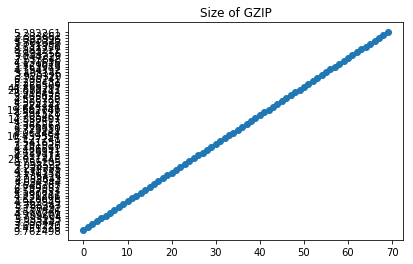

In [13]:
X = coeff["GZIP"].to_string(index=False).replace(" ", "").split("\n")
Y = [i for i in range(len(coeff['GZIP']))]
plt.scatter(Y,X)
plt.title("Size of GZIP")
plt.show()